# Exploratory Data Analysis

In [36]:
%matplotlib inline

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import itertools

import warnings
warnings.filterwarnings('ignore')

In [37]:
# load the data
adni_df = pd.read_csv('../../data/Merge/ADNIMERGE.csv')
adni_df.columns.values

array(['RID', 'PTID', 'VISCODE', 'SITE', 'COLPROT', 'ORIGPROT',
       'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT',
       'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA',
       'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR',
       'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat',
       'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal',
       'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG',
       'FSVERSION', 'IMAGEUID', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit',
       'mPACCtrailsB', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl',
       'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl',
       'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
  

## Demographic Information

The patient demographics helped shape some of our goals and research questions. First, we noticed that all participants were at or above the age of 55. This means that our ability to make an "early" diagnosis is limited, since many of the participants got a screening done since they exhibited symptoms of cognitive impairment of some form. Second, we notice that a majority of our population is white and married. We understand that this means that our findings do not extend to a larger population.

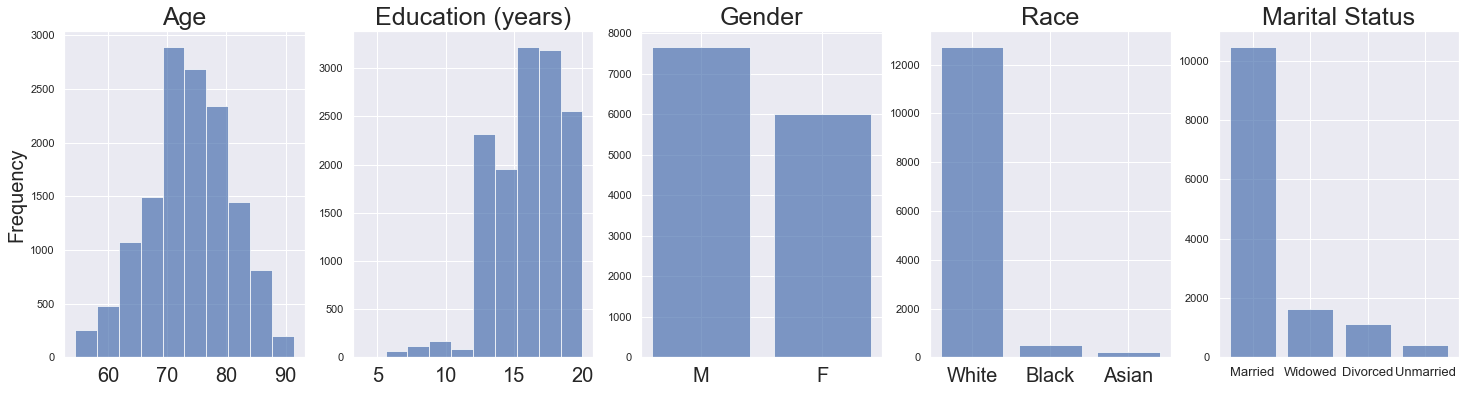

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25,6))
axes = ax.ravel()
fields = ['AGE', 'PTEDUCAT', 'PTGENDER', 'PTETHCAT', 'PTMARRY']

# AGE
visits = adni_df['AGE'].dropna(axis=0)
axes[0].hist(visits, bins=10, alpha=0.7)
ax[0].set_title('Age',fontsize=25)
ax[0].set_ylabel('Frequency',fontsize=20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

# EDUCATION
visits = adni_df['PTEDUCAT'].dropna(axis=0)
axes[1].hist(visits, bins=10, alpha=0.7)
ax[1].set_title('Education (years)',fontsize=25)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

# GENDER
visits = adni_df['PTGENDER'].dropna(axis=0)
names = [val[0] for val in visits.value_counts().index.values]
heights = visits.value_counts().values
ax[2].bar(names, heights, alpha=0.7)
ax[2].set_title('Gender',fontsize=25)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

# RACE
visits = adni_df['PTRACCAT'].dropna(axis=0)
names = visits.value_counts().index.values[0:3]
heights = visits.value_counts().values[0:3]
ax[3].bar(names, heights, alpha=0.7)
ax[3].set_title('Race',fontsize=25)
for tick in ax[3].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

# MARITAL STATUS
visits = adni_df['PTMARRY'].dropna(axis=0)
names = ['Married', 'Widowed', 'Divorced', 'Unmarried']
heights = visits.value_counts().values[0:4]
ax[4].bar(names, heights, alpha=0.7)
ax[4].set_title('Marital Status',fontsize=25)
for tick in ax[4].xaxis.get_major_ticks():
    tick.label.set_fontsize(13) 

## Initial Diagnoses

The baseline diagnoses are encoded in two ways in the ADNI Merge Dataset. The first encoding is as follows: 

1. CN: Cognitively Normal
2. MCI: Mild Cognitive Impairment
3. Dementia: Alzheimer's Disease or other Dementia. 

The second encoding is as follows: 

1. CN: Cognitively Normal
2. EMCI: Early Mild Cognitive Impairment
3. LMCI: Late Mild Cognitive Impairment
4. SMC: Significant Memory Concerns
5. AD: Alzheimer's Disease

We choose the first encoding, changing 'Dementia' to 'AD' since there is an equivalency in the encoding of these categories. The second encoding is present only in the baseline diagnoses and not in the subsequent diagnoses, and part of our modeling is to predict future decline, so we choose the first encoding to remain consistent between diagnoses at different points of time.

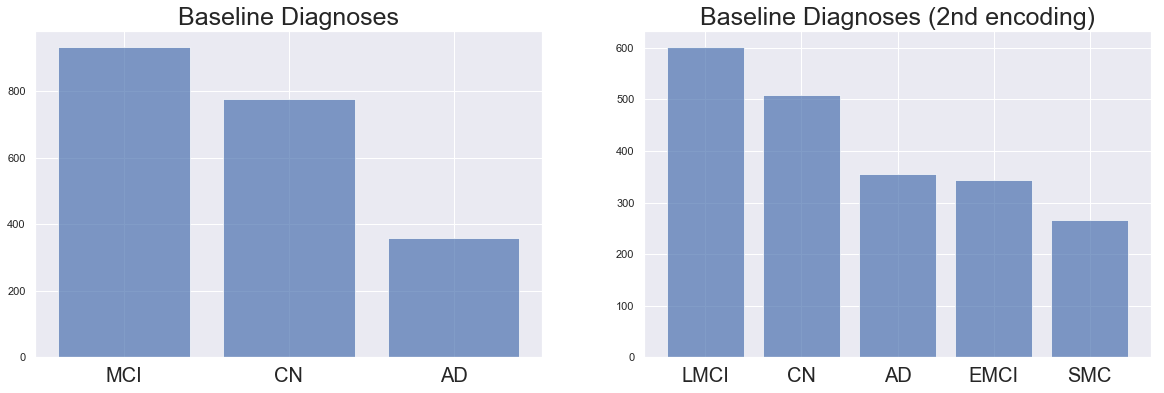

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
axes = ax.ravel()
sub_df = adni_df[adni_df['M'] == 0]

# DX
dxs = sub_df['DX'].map({'Dementia': 'AD', 'CN': 'CN', 'MCI': 'MCI'})
names =  dxs.value_counts().index.values
heights = dxs.value_counts().values
axes[0].bar(names, heights, alpha=0.7)
axes[0].set_title('Baseline Diagnoses', fontsize=25)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    
# DX_bl
dxs = sub_df['DX_bl']
names =  dxs.value_counts().index.values
heights = dxs.value_counts().values
axes[1].bar(names, heights, alpha=0.7)
axes[1].set_title('Baseline Diagnoses (2nd encoding)', fontsize=25)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

### Important Predictors for Initial Diagnosis

From a histogram of baseline values for all predictors in our dataset conditional on initial diagnosis, a few predictors stood out to us, as being promising indicators of baseline diagnosis. These pertained to examination scores, which doctors heavily rely on to make their initial diagnoses. This influenced our decision to explore one such heavily influential examination, the MMSE (Mini-Mental State Examination) in particular.

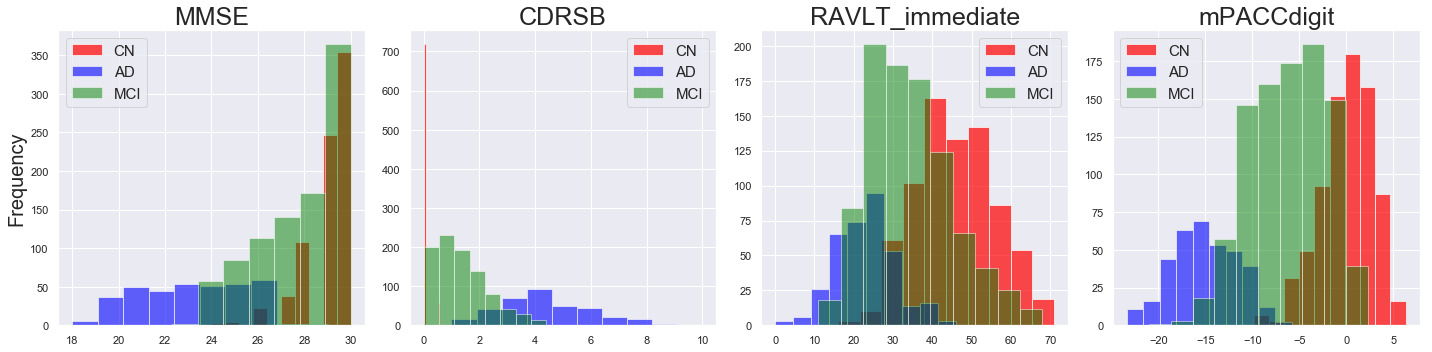

In [5]:
color_dict = {'CN': 'red', 'AD': 'blue', 'Dementia': 'blue', 'LMCI': 'green', 'MCI': 'green', 'EMCI': 'orange',
             'SMC': 'purple'}
name_dict = {'CN': 'CN', 'Dementia': 'AD', 'MCI': 'MCI'}
baseline_df = adni_df[adni_df['M'] == 0]
variables = ['MMSE', 'CDRSB', 'RAVLT_immediate', 'mPACCdigit']
row = math.ceil(len(variables)/4)
col = min(4,len(variables))
fig, ax = plt.subplots(figsize=(5*col,5*row), nrows=row, ncols=col)
axes = ax.ravel()
for i, var in enumerate(variables):
    if i == 0:
        axes[i].set_ylabel('Frequency', fontsize=20)
    time = 'M'
    diag = 'DX'
    df_copy = baseline_df[[time,diag,var]].copy().dropna(axis=0)
    dxs = df_copy[diag].unique()
    for c, dx in enumerate(dxs):
        df_inb = df_copy[df_copy[diag] == dx]
        color = color_dict[dx]
        axes[i].hist(df_inb[var], color=color, label=name_dict[dx], alpha=(0.7-0.1*c))
    axes[i].set_title(var, fontsize=25)
    axes[i].legend(fontsize=15)
fig.tight_layout()

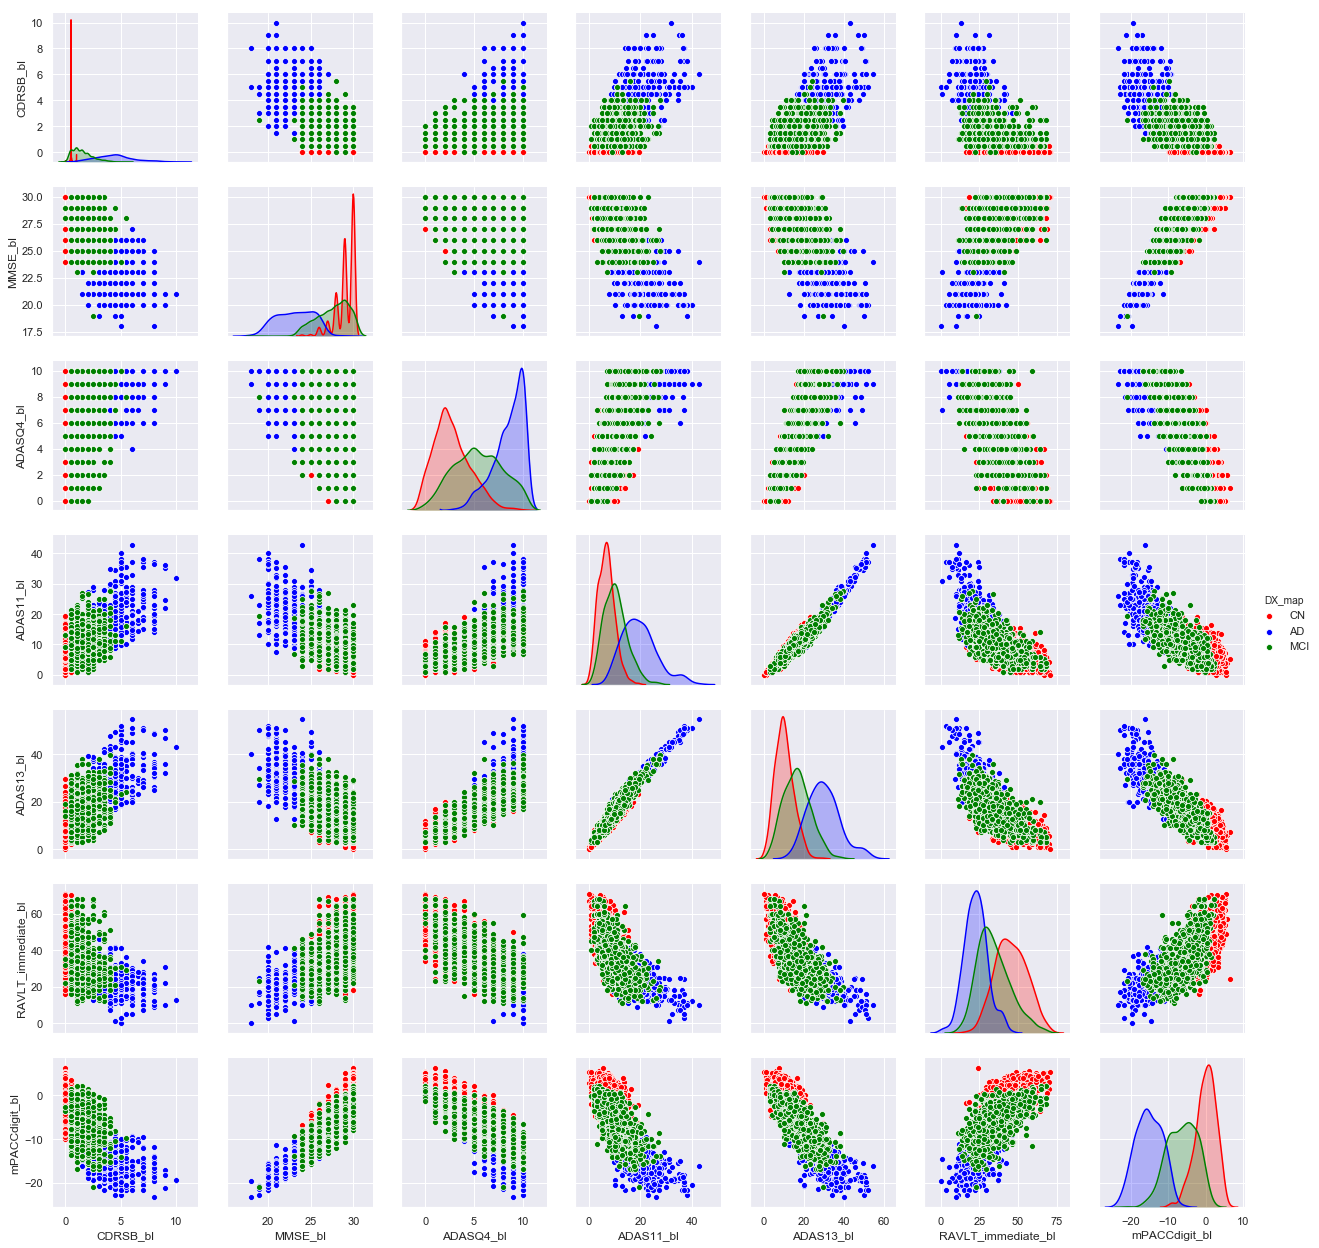

In [38]:
cols = ['DX']
baseline_df = adni_df[adni_df['M'] == 0]
baseline_df['DX_map'] = baseline_df['DX'].map(name_dict)
for col in baseline_df.columns.values:
    if '_bl' in col:
        cols.append(col)
cols = ['CDRSB_bl', 'MMSE_bl', 'ADASQ4_bl', 'ADAS11_bl', 'ADAS13_bl', 'RAVLT_immediate_bl', 'mPACCdigit_bl']
sns.pairplot(baseline_df, vars=cols, hue="DX_map", height=2.5, diag_kind='kde', 
             palette={'CN': 'red', 'MCI': 'green', 'AD': 'blue'})

## Diagnoses Over Time

In [ ]:
# TODO: Plot the kde here of diagnoses


### MMSE scores over time

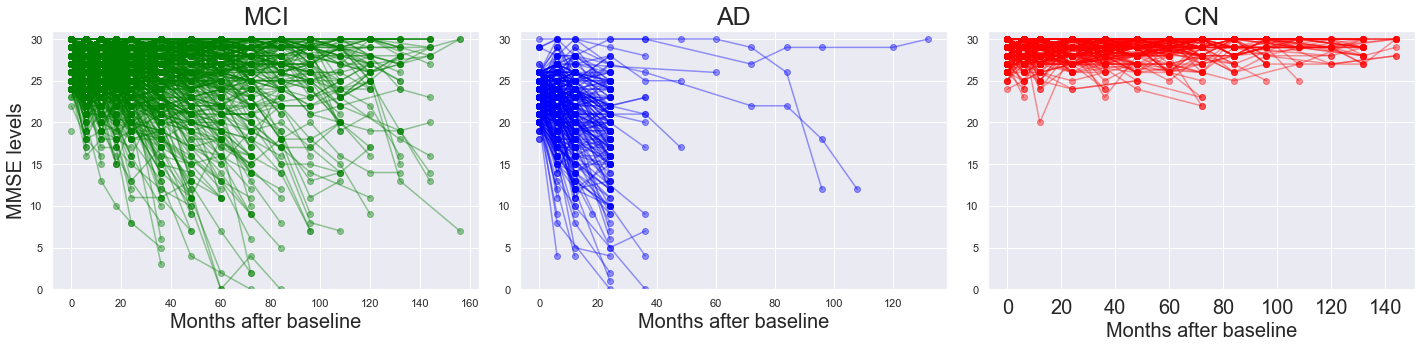

In [43]:
traj_df = adni_df[['RID', 'M', 'MMSE', 'DX_bl', 'DX']].dropna(axis=0)
traj_df = traj_df.groupby('RID').aggregate({'M': lambda x: list(x), 'MMSE': lambda x: list(x), 'DX_bl': 'max',
                                           'DX': 'max'})
diags = traj_df['DX'].unique()

fig, ax = plt.subplots(ncols=len(diags), nrows=1, figsize=(20,5))
axes = ax.ravel()

for i,dx in enumerate(diags):
    if i == 0:
        axes[i].set_ylabel('MMSE levels', fontsize=20)
    for diag, vals, mths in traj_df[traj_df['DX'] == dx][['DX', 'MMSE', 'M']].values:
        sort_mths = [mth for mth,val in sorted(zip(mths,vals))]
        sort_vals = [val for mth,val in sorted(zip(mths,vals))]
        axes[i].plot(sort_mths, sort_vals, 'o-', alpha=0.4, color=color_dict[dx])
    axes[i].set_title(name_dict[dx], fontsize=25)
    axes[i].set_xlabel('Months after baseline', fontsize=20)
    axes[i].set_ylim((0,31))
for tick in axes[i].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
fig.tight_layout()

### Change in Diagnosis Between First Visit and Latest Visit

In [80]:
df = adni_df.copy()
indexes_last_visit=[]
for patient_ids in df.PTID.unique():
    latest_visit_M=df[df.PTID==patient_ids]['M'].max()
    d=df[ df.PTID==patient_ids ]['M']== latest_visit_M
    ind=d.index[-1]
    indexes_last_visit.append(ind);

# Only last visits
df_last=df.loc[indexes_last_visit]

df_dx = adni_df[adni_df['M'] == 0]
df_dx['DX0'] = df_dx['DX']
df_last_imp = df_last[['RID','DX']]
df_dx = df_dx[['RID', 'DX']]
df_dx = df_dx.merge(df_last_imp, how='left', on='RID')
df_dx = df_dx.dropna(axis=0) 
print(df_dx.shape)

(1648, 3)


In [82]:
df_dx['DX_x'] = df_dx['DX_x'].map(name_dict)
df_dx['DX_y'] = df_dx['DX_y'].map(name_dict)
df_dx['DX_x'].value_counts()
df_dx['DX_y'].value_counts()
df_dx['transition'] = df_dx['DX_x'] + ',' + df_dx['DX_y']

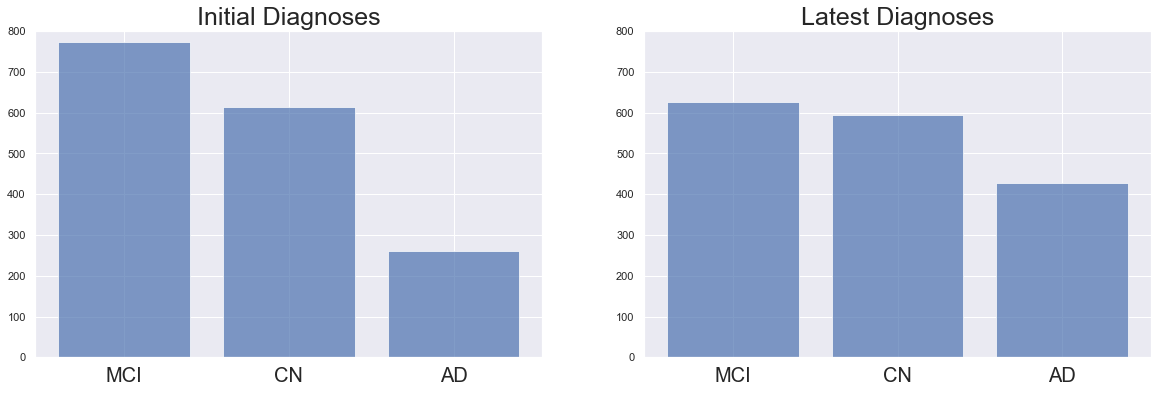

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
axes = ax.ravel()
sub_df = df_dx

# DX
dxs = sub_df['DX_x']
names =  dxs.value_counts().index.values
heights = dxs.value_counts().values
axes[0].bar(names, heights, alpha=0.7)
axes[0].set_title('Initial Diagnoses', fontsize=25)
axes[0].set_ylim(0,800)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    
# DX_bl
dxs = sub_df['DX_y']
names =  dxs.value_counts().index.values
heights = dxs.value_counts().values
axes[1].bar(names, heights, alpha=0.7)
axes[1].set_title('Latest Diagnoses', fontsize=25)
axes[1].set_ylim(0,800)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

In [88]:
outcomes = df_dx['transition'].value_counts()
outcomes = outcomes.to_dict()

In [116]:
# Creating tuples of the form (source, destination, value) in order to play nice with plotly

k1_dict = {'CN': 0, 'MCI': 1, 'AD': 2}
k2_dict = {'CN': 3, 'MCI': 4, 'AD': 5}
tuples = []
tables = np.zeros(shape=(3,3))
for k in outcomes:
    v = outcomes[k]
    k1, k2 = k.split(',')
    tuples.append(tuple([k1_dict[k1], k2_dict[k2], v]))
    tables[k1_dict[k1]][k1_dict[k2]] = v
# print(tuples)
table_changes = pd.DataFrame(tables, columns=['End CN', 'End MCI', 'End AD'])
table_changes['DX'] = ['Start CN', 'Start MCI', 'Start AD']
columns = table_changes.columns.tolist()
columns = columns[-1:] + columns[:-1]
table_changes = table_changes[columns] 
table_changes

,DX,End CN,End MCI,End AD
0,Start CN,555.0,48.0,12.0
1,Start MCI,39.0,578.0,156.0
2,Start AD,0.0,1.0,259.0


In [117]:
data = dict(
    type='sankey',
    node = dict(
      pad = 55,
      thickness = 10,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ["CN", "MCI", "AD"]*3,
      color = ["red", "green", "blue"]*3
    ),
    link = dict(
      source = list(list(zip(*tuples))[0]),
      target = list(list(zip(*tuples))[1]),
      value = list(list(zip(*tuples))[2])
  ))

layout =  dict(
    title = "Change in diagnoses",
    font = dict(
      size = 20
    )
)

fig = dict(data=[data], layout=layout)
iplot(fig, validate=False)

## Deep Dive into MMSE